# Pima Indians Diabetes

#### The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## DataSet Description:

####  Pregnancies: Number of times pregnant
    
#### Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
    
#### BloodPressure: Diastolic blood pressure (mm Hg)
    
#### SkinThickness: Triceps skinfold thickness (mm)
    
#### Insulin: 2-Hour serum insulin (mu U/ml)
    
#### BMI: Body mass index (weight in kg/(height in m)^2)
    
#### Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
    
#### Age: Age in years
    
#### Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

## Task Completed:

#### Import Libraries

#### Data Preparation

#### Data Interpretation

#### Missing Value Treatment

#### Exploratory Data Analysis

#### Data Cleaning

#### Scale the Data

#### A. Logistic Regression

#### B. GaussianNB

#### C. KNNeighborsClassifier

#### D.Decision Tree Classifier

#### E.Random Forest Classifier

#### F. XGBoost (eXtreme Gradient Boost) Classifier

#### G. AdaBoost classifier

#### H. Gradient Boosting

#### I. Stack Generalization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
#import math
#import random

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('pima-indians-diabetes-1.csv')
df.head(2)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [5]:
df.tail(2)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

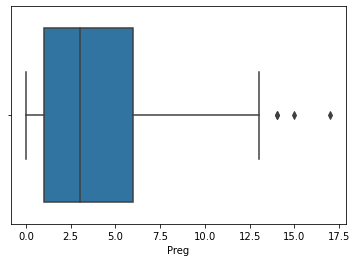

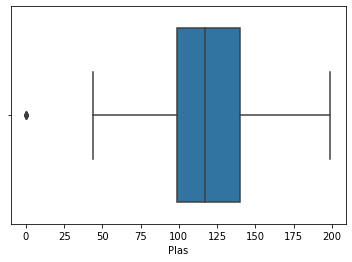

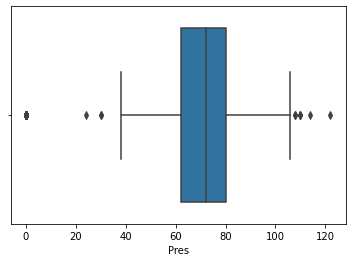

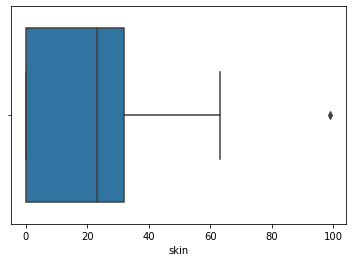

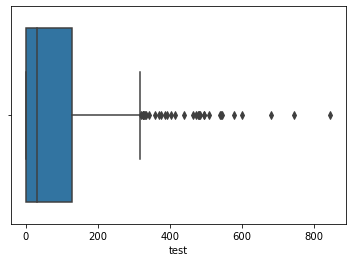

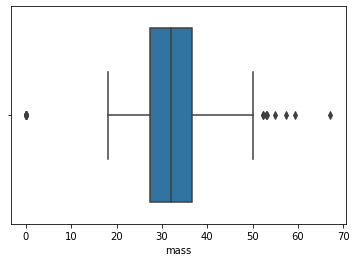

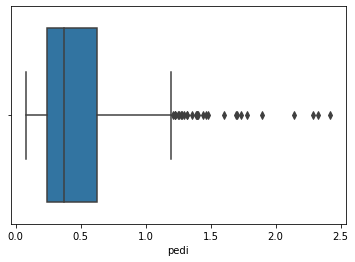

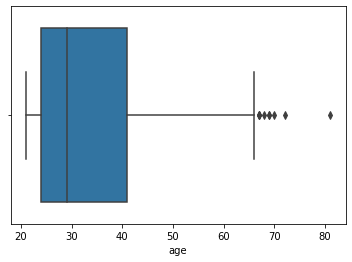

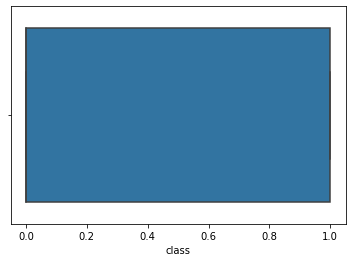

In [10]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [11]:
df.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [12]:
df_features=df.drop(columns='class')
df_target=df['class']

In [13]:
df_features.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [14]:
standard_scaling=StandardScaler()
df_features1=standard_scaling.fit_transform(df_features)
df_features_scaled = pd.DataFrame(df_features1, columns = df_features.columns)

<AxesSubplot:xlabel='class', ylabel='count'>

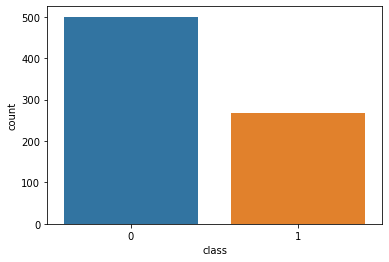

In [15]:
sns.countplot(df_target)

In [16]:
df_target.value_counts()

0    500
1    268
Name: class, dtype: int64

In [17]:
X1=df_features_scaled
Y1=df_target

In [18]:
import statsmodels.api as sm
X1=sm.add_constant(X1)

In [19]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,Y_train_1,Y_test_1=train_test_split(X1,Y1,test_size=0.30,random_state=100)

In [20]:
print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(537, 9)
(231, 9)
(537,)
(231,)


In [21]:
from imblearn.over_sampling import SMOTE 
sm1 = SMOTE(random_state=42)
X_train_1, Y_train_1 = sm1.fit_resample(X_train_1, Y_train_1)
Y_train_1.value_counts()

0    350
1    350
Name: class, dtype: int64

In [22]:
# A. Logistic Regression

In [23]:
#without handling outliers

In [24]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(Y_train_1, X_train_1).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.473477
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  700
Model:                          Logit   Df Residuals:                      691
Method:                           MLE   Df Model:                            8
Date:                Fri, 25 Jun 2021   Pseudo R-squ.:                  0.3169
Time:                        18:47:42   Log-Likelihood:                -331.43
converged:                       True   LL-Null:                       -485.20
Covariance Type:            nonrobust   LLR p-value:                 1.023e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2628      0.098     -2.675      0.007      -0.455      -0.070
Preg           0.3850      0.

In [25]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob1 = logreg.predict(X_test_1)

# print the y_pred_prob
y_pred_prob1.head()

173    0.260686
253    0.099416
207    0.878366
737    0.166439
191    0.619459
dtype: float64

In [26]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred1 = [ 0 if x < 0.5 else 1 for x in y_pred_prob1]

In [27]:
# print the first five observations of y_pred
y_pred1[0:5]

[0, 0, 1, 0, 1]

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing classification report
print(classification_report(Y_test_1, y_pred1))
print(accuracy_score(Y_test_1, y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       150
           1       0.61      0.73      0.66        81

    accuracy                           0.74       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.76      0.74      0.74       231

0.7402597402597403


In [29]:
#with handling outliers

In [30]:
df_features2=df.drop(columns='class')
df_target2=df['class']

In [31]:
print("skewness values before and after handling the outliers:\n")
skew_before = df_features2.skew()
column_name = df_features2.columns
for i in range(df_features2.shape[1]):
    q1=df_features2.quantile(0.25)
    q3=df_features2.quantile(0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    df_features2.iloc[:,i]=np.where(df_features2.iloc[:,i] < lb[i],lb[i],df_features2.iloc[:,i])
    df_features2.iloc[:,i]=np.where(df_features2.iloc[:,i] > ub[i],ub[i],df_features2.iloc[:,i])
skew_after = df_features2.skew()
outlier = pd.concat([skew_before,skew_after],axis=1,keys=['skewness before','skewness after'])
outlier

skewness values before and after handling the outliers:



,skewness before,skewness after
Preg,0.901674,0.853962
Plas,0.173754,0.417946
Pres,-1.843608,-0.406036
skin,0.109372,0.026663
test,2.272251,1.173898
mass,-0.428982,0.135809
pedi,1.919911,1.024428
age,1.129597,1.067170


In [32]:
df_features2.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000


In [33]:
from sklearn.preprocessing import StandardScaler
standard_scaling=StandardScaler()
df_features2_1=standard_scaling.fit_transform(df_features2)
df_features2_scaled = pd.DataFrame(df_features2_1, columns = df_features2.columns)

In [34]:
X2=df_features2_scaled
Y2=df_target

In [35]:
import statsmodels.api as sm
X2=sm.add_constant(X2)

In [36]:
from sklearn.model_selection import train_test_split
X_train_2,X_test_2,Y_train_2,Y_test_2=train_test_split(X2,Y2,test_size=0.30,random_state=100)

In [37]:
print(X_train_2.shape)
print(X_test_2.shape)
print(Y_train_2.shape)
print(Y_test_2.shape)

(537, 9)
(231, 9)
(537,)
(231,)


In [38]:
from imblearn.over_sampling import SMOTE 
sm2 = SMOTE(random_state=42)
X_train_2, Y_train_2 = sm2.fit_resample(X_train_2, Y_train_2)
Y_train_2.value_counts()

0    350
1    350
Name: class, dtype: int64

In [39]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg2 = sm.Logit(Y_train_2, X_train_2).fit()

# print the summary of the model
print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.466086
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  700
Model:                          Logit   Df Residuals:                      691
Method:                           MLE   Df Model:                            8
Date:                Fri, 25 Jun 2021   Pseudo R-squ.:                  0.3276
Time:                        18:47:42   Log-Likelihood:                -326.26
converged:                       True   LL-Null:                       -485.20
Covariance Type:            nonrobust   LLR p-value:                 6.393e-64
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2597      0.099     -2.626      0.009      -0.454      -0.066
Preg           0.3811      0.

In [40]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob2 = logreg2.predict(X_test_1)

# print the y_pred_prob
y_pred_prob2.head()

173    0.239536
253    0.097317
207    0.891306
737    0.161393
191    0.596756
dtype: float64

In [41]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred2 = [ 0 if x < 0.5 else 1 for x in y_pred_prob2]

In [42]:
# print the first five observations of y_pred
y_pred2[0:5]

[0, 0, 1, 0, 1]

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing classification report
print(classification_report(Y_test_2, y_pred2))
print(accuracy_score(Y_test_2, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       150
           1       0.60      0.74      0.66        81

    accuracy                           0.74       231
   macro avg       0.72      0.74      0.72       231
weighted avg       0.76      0.74      0.74       231

0.7359307359307359


In [44]:
#with handling outliers (IQR)

In [45]:
df2=df.copy()

In [46]:
df2.shape

(768, 9)

In [47]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Preg       5.0000
Plas      41.2500
Pres      18.0000
skin      32.0000
test     127.2500
mass       9.3000
pedi       0.3825
age       17.0000
class      1.0000
dtype: float64


In [48]:
df2_out = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [49]:
df2_out.shape

(639, 9)

In [50]:
df_target3=df2_out['class']
df_features3=df2_out.drop(columns='class',axis=1)

In [51]:
from sklearn.preprocessing import StandardScaler
standard_scaling=StandardScaler()
df_features2_2=standard_scaling.fit_transform(df_features3)
df_features3_scaled = pd.DataFrame(df_features2_2, columns = df_features3.columns)

In [52]:
X3=df_features3_scaled
Y3=df_target3

In [53]:
import statsmodels.api as sm
X3=sm.add_constant(X3)

In [54]:
from sklearn.model_selection import train_test_split
X_train_3,X_test_3,Y_train_3,Y_test_3=train_test_split(X3,Y3,test_size=0.30,random_state=100)

In [55]:
from imblearn.over_sampling import SMOTE 
sm3 = SMOTE(random_state=42)
X_train_3, Y_train_3 = sm3.fit_resample(X_train_3, Y_train_3)
Y_train_3.value_counts()

0    310
1    310
Name: class, dtype: int64

In [56]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg3 = sm.Logit(Y_train_3, X_train_3).fit()

# print the summary of the model
print(logreg3.summary())

Optimization terminated successfully.
         Current function value: 0.483739
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  620
Model:                          Logit   Df Residuals:                      611
Method:                           MLE   Df Model:                            8
Date:                Fri, 25 Jun 2021   Pseudo R-squ.:                  0.3021
Time:                        18:47:43   Log-Likelihood:                -299.92
converged:                       True   LL-Null:                       -429.75
Covariance Type:            nonrobust   LLR p-value:                 1.536e-51
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4060      0.106     -3.830      0.000      -0.614      -0.198
Preg           0.3539      0.

In [57]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob3 = logreg3.predict(X_test_3)

# print the y_pred_prob
y_pred_prob3.head()

149    0.062535
396    0.267782
73     0.373183
420    0.198404
253    0.386882
dtype: float64

In [58]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred3 = [ 0 if x < 0.5 else 1 for x in y_pred_prob3]

In [59]:
# print the first five observations of y_pred
y_pred3[0:5]

[0, 0, 0, 0, 0]

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing classification report
print(classification_report(Y_test_3, y_pred3))
print(accuracy_score(Y_test_3, y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       129
           1       0.65      0.68      0.67        63

    accuracy                           0.78       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.78      0.78      0.78       192

0.7760416666666666


In [61]:
# B. GaussianNB

In [62]:
# instantiate the 'GaussianNB'
from sklearn.naive_bayes import GaussianNB
gnb3 = GaussianNB()

# fit the model using fit() on train data
gnb_model3 = gnb3.fit(X_train_3, Y_train_3)

In [63]:
gnb_preds3 = gnb_model3.predict(X_test_3)

In [64]:
print(classification_report(Y_test_3, gnb_preds3))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       129
           1       0.62      0.62      0.62        63

    accuracy                           0.75       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.75      0.75      0.75       192



In [65]:
from sklearn import metrics
print("Accuracy of GaussianNB Classifier:", metrics.accuracy_score(Y_test_3, gnb_preds3)*100,'%')

Accuracy of GaussianNB Classifier: 75.0 %


In [66]:
# define a function to plot the ROC curve and print the ROC-AUC score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
def plot_roc(model):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob3 = model.predict_proba(X_test_3)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(Y_test_3, y_pred_prob3)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(Y_test_3, y_pred_prob3),4)))

    # plot the grid
    plt.grid(True)

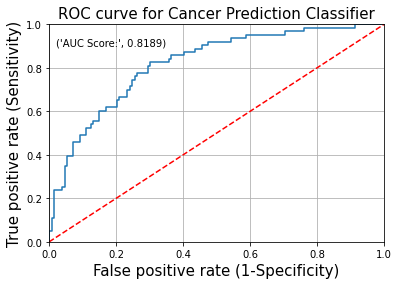

In [67]:
plot_roc(gnb_model3)

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_3, gnb_preds3)

array([[105,  24],
       [ 24,  39]], dtype=int64)

In [69]:
# C. KNeighborsClassifier

In [70]:
# define the K nearest neighbours model
from sklearn.neighbors import KNeighborsClassifier
knc3 = KNeighborsClassifier(n_neighbors=3)
# train our K nearest neighbours model with the x and y training sets
# fit the model using fit() on train data
knc_model3 = knc3.fit(X_train_3, Y_train_3)

In [71]:
knc_preds3 = knc_model3.predict(X_test_3)

In [72]:
print(classification_report(Y_test_3, knc_preds3))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       129
           1       0.55      0.63      0.59        63

    accuracy                           0.71       192
   macro avg       0.68      0.69      0.68       192
weighted avg       0.72      0.71      0.71       192



In [73]:
print("Accuracy of KNeighbors Classifier:", metrics.accuracy_score(Y_test_3, knc_preds3)*100,'%')

Accuracy of KNeighbors Classifier: 70.83333333333334 %


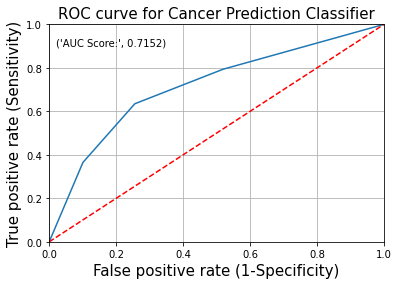

In [74]:
plot_roc(knc_model3)

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_3, knc_preds3)

array([[96, 33],
       [23, 40]], dtype=int64)

In [76]:
#Optimal Value of K (using GridSearchCV)

In [77]:
from sklearn.model_selection import GridSearchCV
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train_3, Y_train_3)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 1} 



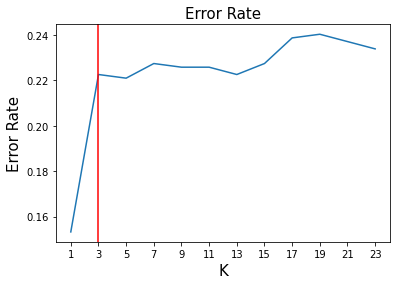

In [78]:
from sklearn.model_selection import cross_val_score 
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'euclidean')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, X_train_3, Y_train_3, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,25,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 3, color = 'red')

# display the plot
plt.show()

In [79]:
knc_model3_1 = knn_grid.fit(X_train_3, Y_train_3)

In [80]:
knc_preds3_1 = knc_model3_1.predict(X_test_3)

In [81]:
print(classification_report(Y_test_3, knc_preds3_1))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       129
           1       0.55      0.48      0.51        63

    accuracy                           0.70       192
   macro avg       0.65      0.64      0.65       192
weighted avg       0.69      0.70      0.69       192



In [82]:
print("Accuracy of KNeighbors Classifier:", metrics.accuracy_score(Y_test_3, knc_preds3_1)*100,'%')

Accuracy of KNeighbors Classifier: 69.79166666666666 %


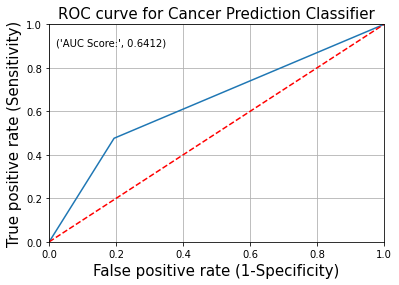

In [83]:
# call the function to plot the ROC curve
# pass the knn model to the function
plot_roc(knn_grid)

In [84]:
#C.Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification1 = DecisionTreeClassifier(max_depth = 3, criterion = 'gini', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification1.fit(X_train_3, Y_train_3)

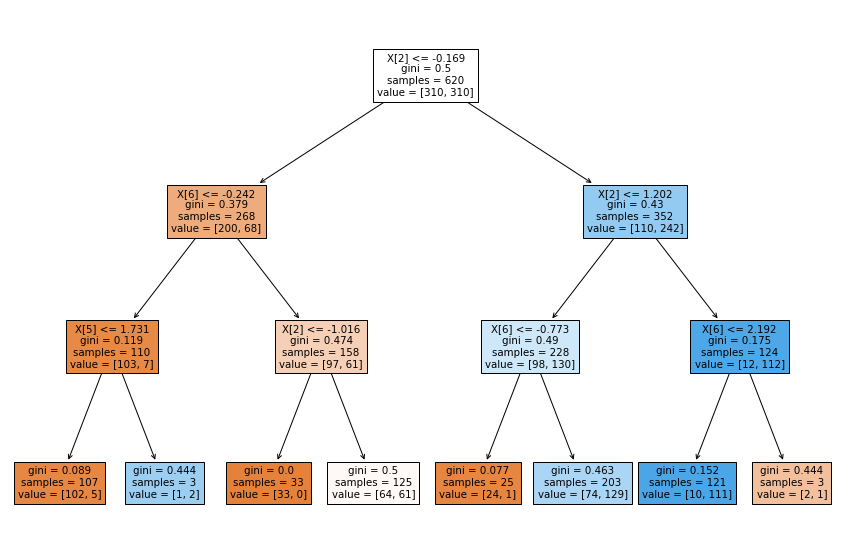

In [86]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True)
plt.show()

In [87]:
#Test

In [88]:
dt_preds3 = decision_tree.predict(X_test_3)

In [89]:
print(classification_report(Y_test_3, dt_preds3))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       129
           1       0.53      0.68      0.60        63

    accuracy                           0.70       192
   macro avg       0.68      0.69      0.68       192
weighted avg       0.73      0.70      0.71       192



In [90]:
print("Accuracy of DecisionTree Classifier :", metrics.accuracy_score(Y_test_3, dt_preds3)*100,'%')

Accuracy of DecisionTree Classifier : 69.79166666666666 %


In [91]:
#Train

In [92]:
dt_preds3_train = decision_tree.predict(X_train_3)

In [93]:
print(classification_report(Y_train_3, dt_preds3_train))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       310
           1       0.74      0.78      0.76       310

    accuracy                           0.75       620
   macro avg       0.75      0.75      0.75       620
weighted avg       0.75      0.75      0.75       620



In [94]:
print("Accuracy of DecisionTree Classifier :", metrics.accuracy_score(Y_train_3, dt_preds3_train)*100,'%')

Accuracy of DecisionTree Classifier : 75.32258064516128 %


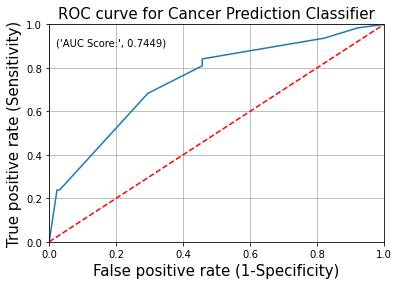

In [95]:
plot_roc(decision_tree)

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_3, dt_preds3)

array([[91, 38],
       [20, 43]], dtype=int64)

In [97]:
#Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [98]:
# Gini & Entropy - GridSearch
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10)
                     }]
 
decision_tree_classification = DecisionTreeClassifier(random_state = 10)


tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train_3, Y_train_3)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 7} 



In [99]:
#Build the model using the tuned hyperparameters.

In [100]:
decision_tree_classification2 = DecisionTreeClassifier(max_depth = 7, criterion = 'gini', random_state = 10,min_samples_split= 7)

# fit the model using fit() on train data
decision_tree2 = decision_tree_classification2.fit(X_train_3, Y_train_3)

In [101]:
#Plot the decision tree with tuned hyperparameters.

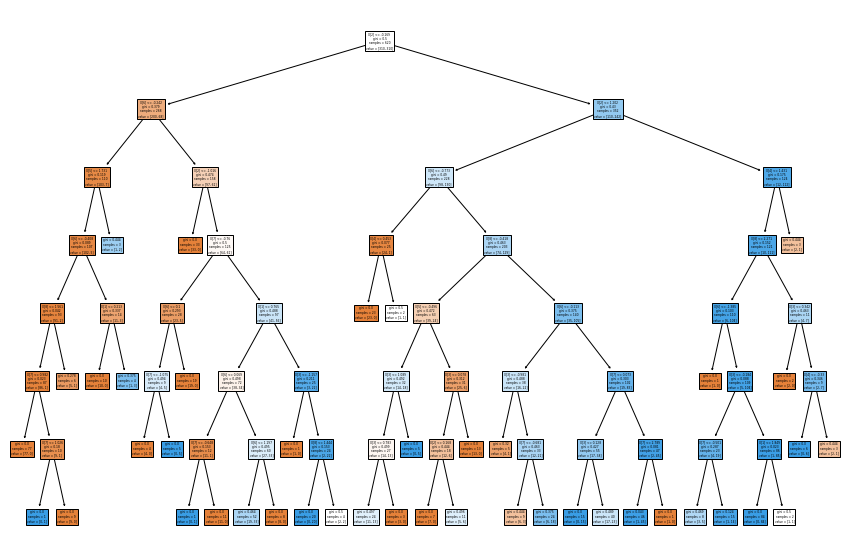

In [102]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree2,filled=True)
plt.show()

In [103]:
dt_preds3_1 = decision_tree2.predict(X_test_3)

In [104]:
print(classification_report(Y_test_3, dt_preds3_1))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       129
           1       0.58      0.78      0.66        63

    accuracy                           0.74       192
   macro avg       0.72      0.75      0.73       192
weighted avg       0.77      0.74      0.75       192



In [105]:
print("Accuracy of DecisionTree Classifier :", metrics.accuracy_score(Y_test_3, dt_preds3_1)*100,'%')

Accuracy of DecisionTree Classifier : 73.95833333333334 %


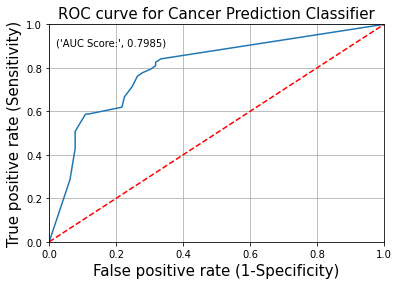

In [106]:
plot_roc(decision_tree2)

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_3, dt_preds3_1)

array([[93, 36],
       [14, 49]], dtype=int64)

In [108]:
#D.Random Forest Classifier

In [109]:
# define our random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier()

# train the model using the x and y training sets
random_forest=rfc1.fit(X_train_3, Y_train_3)

In [110]:
#Test

In [111]:
rfc_preds3 = random_forest.predict(X_test_3)

In [112]:
print(classification_report(Y_test_3, rfc_preds3))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       129
           1       0.67      0.59      0.63        63

    accuracy                           0.77       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.77      0.77      0.77       192



In [113]:
print("Accuracy of RandomForestClassifier :", metrics.accuracy_score(Y_test_3, rfc_preds3)*100,'%')

Accuracy of RandomForestClassifier : 77.08333333333334 %


In [114]:
#Train

In [115]:
rfc_preds3_train = random_forest.predict(X_train_3)

In [116]:
print(classification_report(Y_train_3, rfc_preds3_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00       310

    accuracy                           1.00       620
   macro avg       1.00      1.00      1.00       620
weighted avg       1.00      1.00      1.00       620



In [117]:
print("Accuracy of RandomForestClassifier :", metrics.accuracy_score(Y_train_3, rfc_preds3_train)*100,'%')

Accuracy of RandomForestClassifier : 100.0 %


In [118]:
#From the above output, we can see that there is a lot of difference between the train and test accuracy; 
#thus, we can conclude that the decision tree is over-fiited.

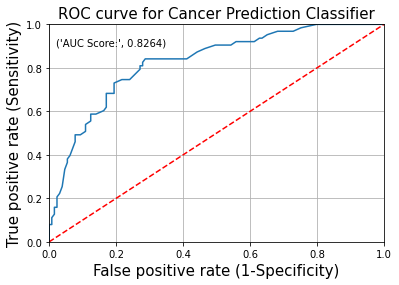

In [119]:
plot_roc(random_forest)

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_3, rfc_preds3)

array([[111,  18],
       [ 26,  37]], dtype=int64)

In [121]:
#Tune the Hyperparameters using GridSearchCV (Random Forest)

In [122]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass a list of values to 'n_estimators' to build the different number of trees in the random forest
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [5],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5],
                     'min_samples_leaf': [1, 5],
                     'max_leaf_nodes': [2, 5]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train_3, Y_train_3)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10} 



In [123]:
rfc2 = RandomForestClassifier(criterion= 'entropy', max_depth= 5, max_features= 'sqrt', max_leaf_nodes= 5, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 10)

# train the model using the x and y training sets
random_forest2=rfc2.fit(X_train_3, Y_train_3)

In [124]:
#Test

In [125]:
rfc_preds3_1= random_forest2.predict(X_test_3)

In [126]:
print(classification_report(Y_test_3, rfc_preds3_1))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       129
           1       0.60      0.63      0.62        63

    accuracy                           0.74       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



In [127]:
print("Accuracy of RandomForestClassifier :", metrics.accuracy_score(Y_test_3, rfc_preds3_1)*100,'%')

Accuracy of RandomForestClassifier : 73.95833333333334 %


In [128]:
#Train

In [129]:
rfc_preds3_train1= random_forest2.predict(X_train_3)

In [130]:
print(classification_report(Y_train_3, rfc_preds3_train1))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       310
           1       0.80      0.83      0.82       310

    accuracy                           0.81       620
   macro avg       0.81      0.81      0.81       620
weighted avg       0.81      0.81      0.81       620



In [131]:
print("Accuracy of RandomForest Classifier :", metrics.accuracy_score(Y_train_3, rfc_preds3_train1)*100,'%')

Accuracy of RandomForest Classifier : 81.29032258064515 %


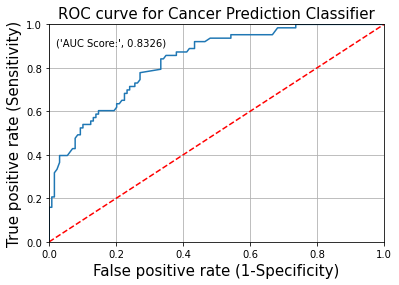

In [132]:
plot_roc(random_forest2)

In [133]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_3, rfc_preds3_1)

array([[102,  27],
       [ 23,  40]], dtype=int64)

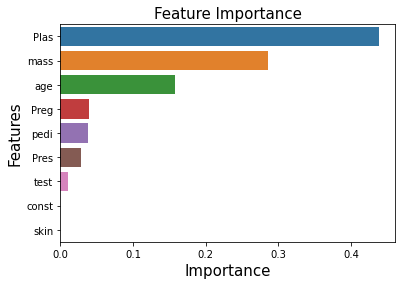

In [134]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train_3.columns, 
                                   'Importance': random_forest2.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [135]:
#Boosting

In [136]:
#E. XGBoost (eXtreme Gradient Boost) Classifier

In [137]:
from xgboost import XGBClassifier
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model1 = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
XGBoost=xgb_model1.fit(X_train_3, Y_train_3)

[18:51:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [138]:
xgb_preds3 = XGBoost.predict(X_test_3)

In [139]:
print(classification_report(Y_test_3, xgb_preds3))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       129
           1       0.69      0.68      0.69        63

    accuracy                           0.80       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.80      0.80      0.80       192



In [140]:
print("Accuracy of XGB Classifier :", metrics.accuracy_score(Y_test_3, xgb_preds3)*100,'%')

Accuracy of XGB Classifier : 79.6875 %


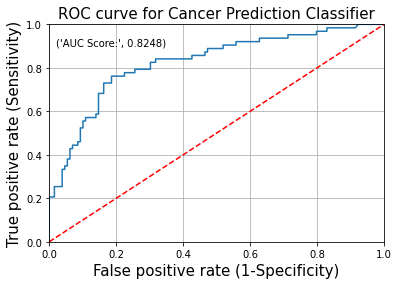

In [141]:
plot_roc(XGBoost)

In [142]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_3, xgb_preds3)

array([[110,  19],
       [ 20,  43]], dtype=int64)

In [143]:
#Tune the Hyperparameters (GridSearchCV)

In [144]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(2,5),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train_3, Y_train_3)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[18:51:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [145]:
xgb_model2 = XGBClassifier(max_depth = 4, gamma = 0,learning_rate= 0.4)

# fit the model using fit() on train data
XGBoost2=xgb_model2.fit(X_train_3, Y_train_3)

[18:52:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [146]:
xgb_preds3_1 = XGBoost.predict(X_test_3)

In [147]:
print(classification_report(Y_test_3, xgb_preds3_1))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       129
           1       0.69      0.68      0.69        63

    accuracy                           0.80       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.80      0.80      0.80       192



In [148]:
print("Accuracy of XGB Classifier :", metrics.accuracy_score(Y_test_3, xgb_preds3_1)*100,'%')

Accuracy of XGB Classifier : 79.6875 %


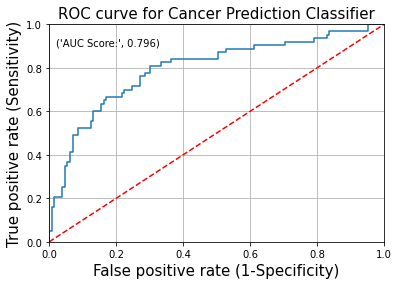

In [149]:
plot_roc(XGBoost2)

In [150]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_3, xgb_preds3_1)

array([[110,  19],
       [ 20,  43]], dtype=int64)

In [151]:
#Identify the Important Features using XGBoost

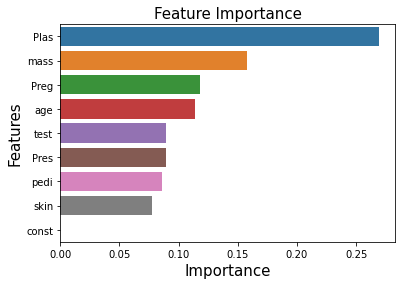

In [152]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': X_train_3.columns, 
                                   'Importance': XGBoost2.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [153]:
#F. AdaBoost classifier

In [154]:
from sklearn.ensemble import AdaBoostClassifier
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
AdaBoost=ada_model.fit(X_train_3, Y_train_3)

In [155]:
Ada_preds3 = XGBoost.predict(X_test_3)

In [156]:
print(classification_report(Y_test_3, Ada_preds3))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       129
           1       0.69      0.68      0.69        63

    accuracy                           0.80       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.80      0.80      0.80       192



In [157]:
print("Accuracy of AdaBoost Classifier :", metrics.accuracy_score(Y_test_3, Ada_preds3)*100,'%')

Accuracy of AdaBoost Classifier : 79.6875 %


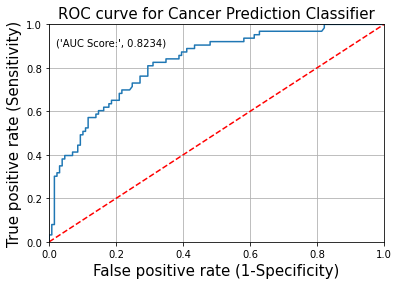

In [158]:
plot_roc(AdaBoost)

In [159]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_3, Ada_preds3)

array([[110,  19],
       [ 20,  43]], dtype=int64)

In [160]:
#G. Gradient Boosting

In [161]:
from sklearn.ensemble import GradientBoostingClassifier
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
GradientBoosting=gboost_model.fit(X_train_3, Y_train_3)

In [162]:
gb_preds3 = GradientBoosting.predict(X_test_3)

In [163]:
print(classification_report(Y_test_3, gb_preds3))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       129
           1       0.62      0.54      0.58        63

    accuracy                           0.74       192
   macro avg       0.70      0.69      0.69       192
weighted avg       0.73      0.74      0.73       192



In [164]:
print("Accuracy of Gradient Boosting Classifier :", metrics.accuracy_score(Y_test_3, gb_preds3)*100,'%')

Accuracy of Gradient Boosting Classifier : 73.95833333333334 %


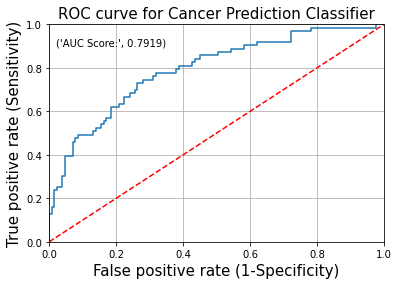

In [165]:
plot_roc(GradientBoosting)

In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_3, gb_preds3)

array([[108,  21],
       [ 29,  34]], dtype=int64)

In [167]:
#H. Stack Generalization

In [168]:
#Build the stacking classifier using the Random forest, KNN and Naive bayes as base learners 
#(consider the hyperparameters tuned using GridSearchCV in the previous sessions).

In [169]:
#combination 1

In [170]:
from sklearn.ensemble import StackingClassifier
# consider the various algorithms as base learners
base_learners = [('RandomForest_model', RandomForestClassifier(criterion= 'entropy', max_depth= 5, max_features= 'sqrt', max_leaf_nodes= 5, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 10)),
                 ('XGB_model', XGBClassifier(max_depth = 4, gamma = 0,learning_rate= 0.4)),
                 ('GradientBoosting_model', GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10))]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GradientBoostingClassifier())

# fit the model on train dataset
StackingClass=stack_model.fit(X_train_3, Y_train_3)

[18:52:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [171]:
Sc_preds3 = StackingClass.predict(X_test_3)

In [172]:
print(classification_report(Y_test_3, Sc_preds3))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       129
           1       0.75      0.48      0.58        63

    accuracy                           0.78       192
   macro avg       0.77      0.70      0.71       192
weighted avg       0.77      0.78      0.76       192



In [173]:
print("Accuracy of Stack Generalization :", metrics.accuracy_score(Y_test_3, Sc_preds3)*100,'%')

Accuracy of Stack Generalization : 77.60416666666666 %


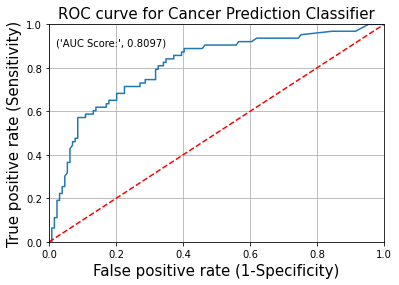

In [174]:
plot_roc(StackingClass)

In [175]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_3, Sc_preds3)

array([[119,  10],
       [ 33,  30]], dtype=int64)